In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\\Users\\Abhay Nayak\\Downloads\\Sales Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop blank/unrelated columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#drop null values
df.dropna(inplace=True)

In [9]:
# change data type from float to int
df['Amount']=df['Amount'].astype('int')

In [10]:
df['Amount'].dtype

dtype('int32')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
# describe() summarizes statistics for the DataFrame, like count, mean, and standard deviation, etc.
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

**Gender**

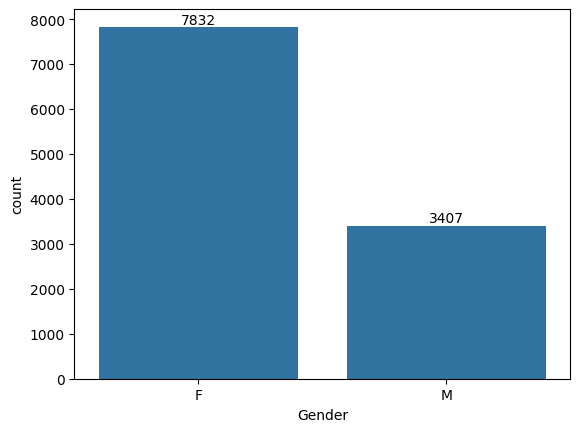

In [13]:
ax = sns.countplot(x = 'Gender', data = df)
plt.bar_label(ax.containers[0]) 
plt.show()

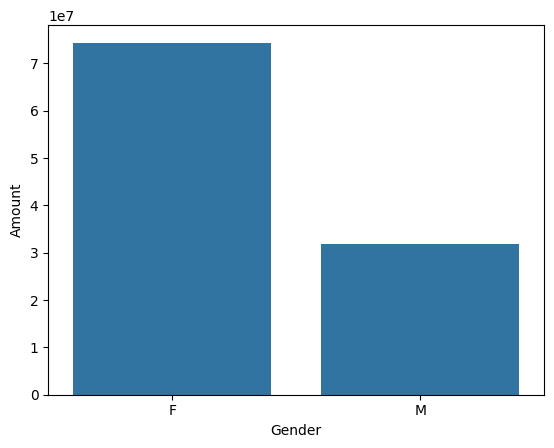

In [14]:
# plotting a bar chart for gender vs total amount
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount' ,data=sales_gen)
plt.show()


The visual representations indicate a higher number of female buyers, showcasing their greater purchasing power compared to men.

**Age**

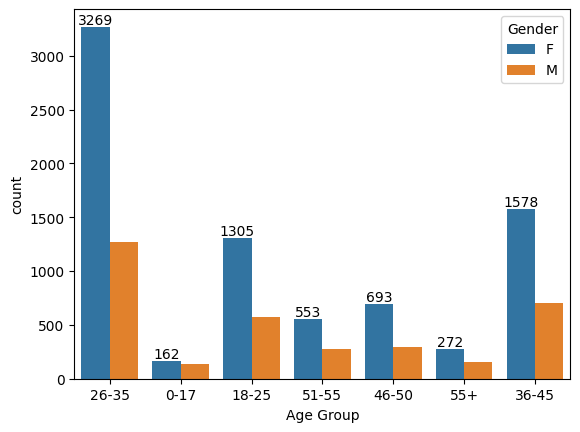

In [15]:
ax = sns.countplot(x = 'Age Group', data = df, hue='Gender')
plt.bar_label(ax.containers[0]) 
plt.show()

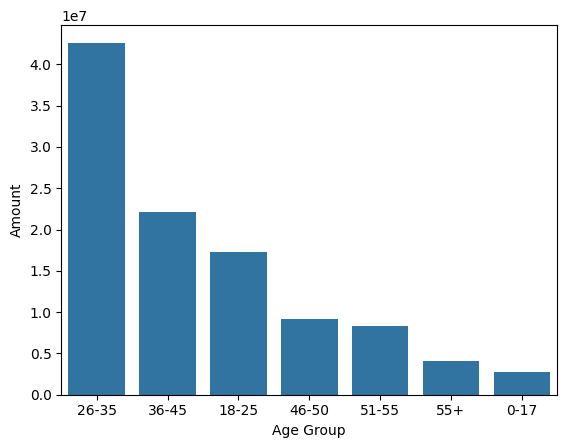

In [16]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.show()

The visual representations indicate that the majority of buyers belong to the 26-35 age group and are predominantly female.

**State**

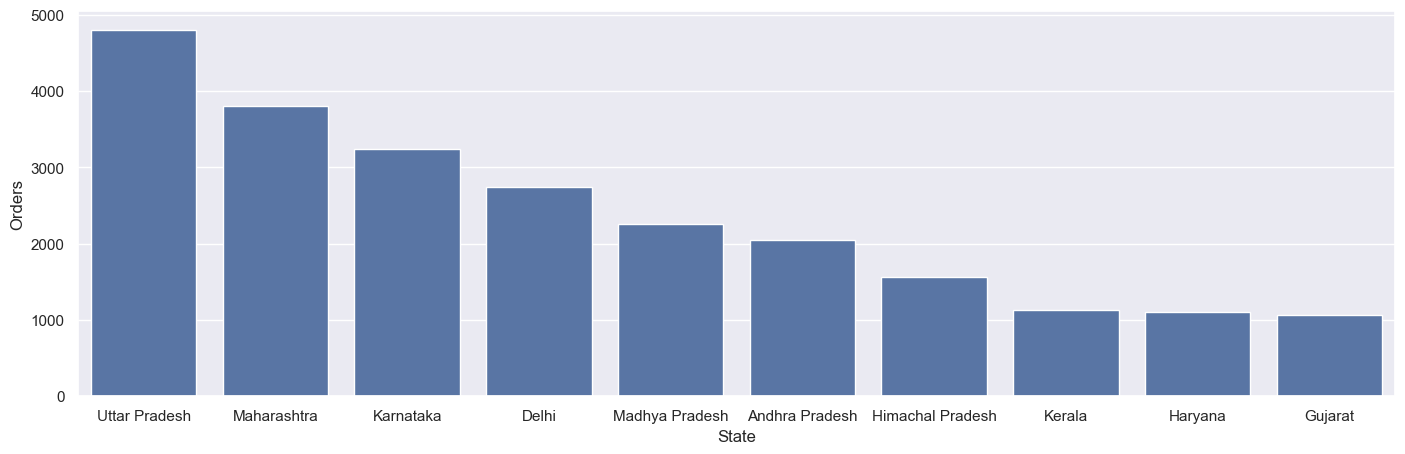

In [17]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.show()

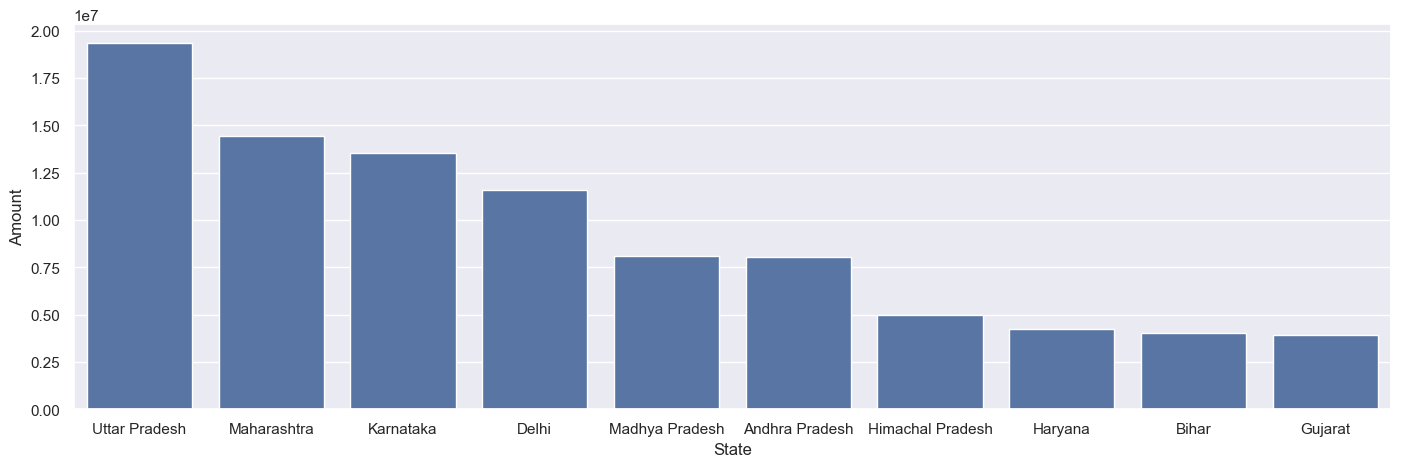

In [18]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.show()

**Marital Status**

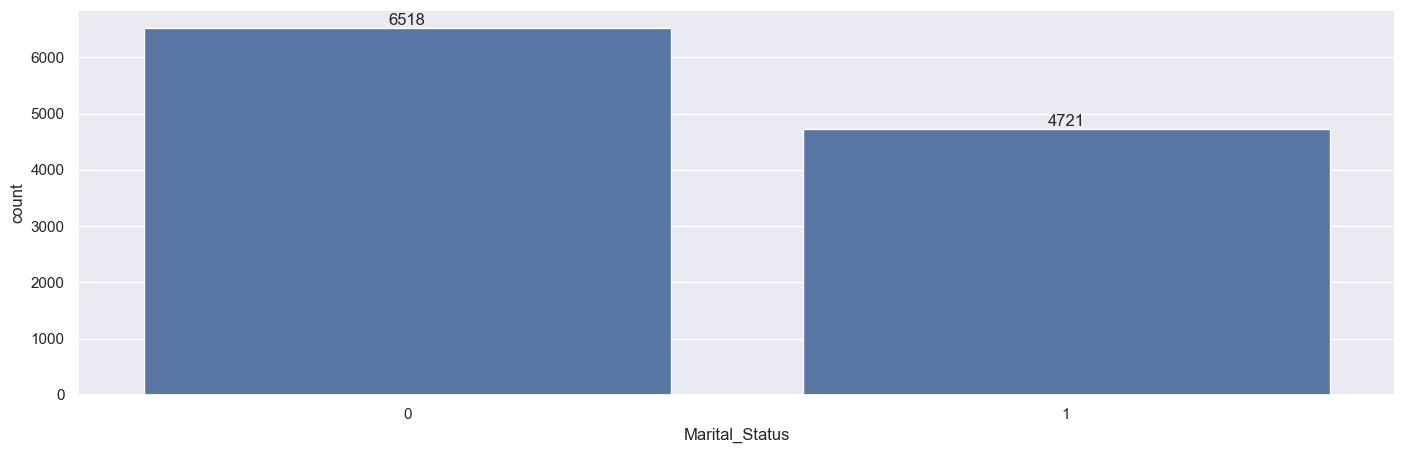

In [19]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
plt.bar_label(ax.containers[0]) 
plt.show()

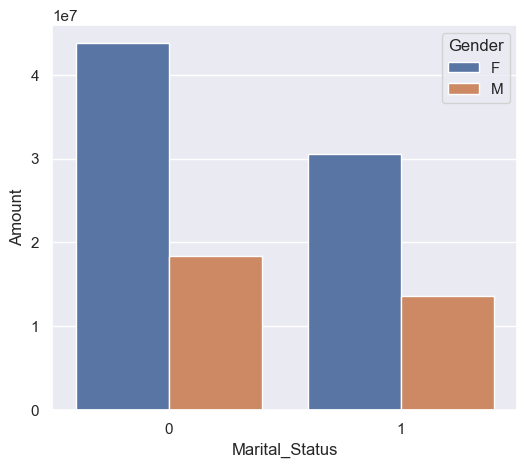

In [20]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

**Occupation**

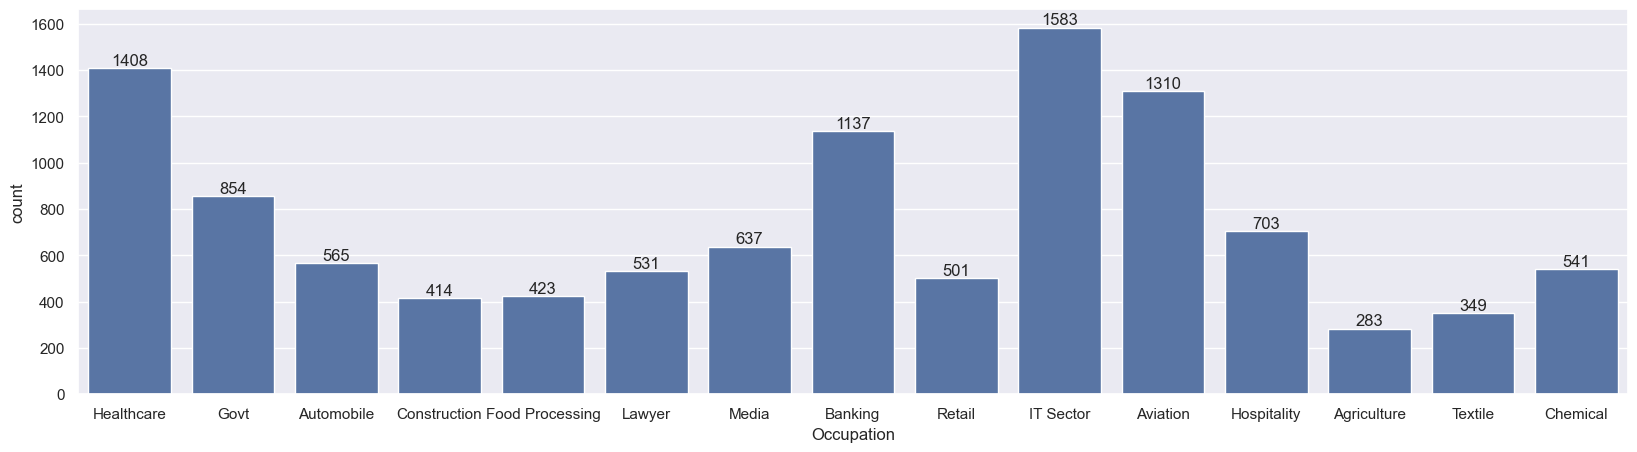

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
plt.bar_label(ax.containers[0]) 
plt.show()

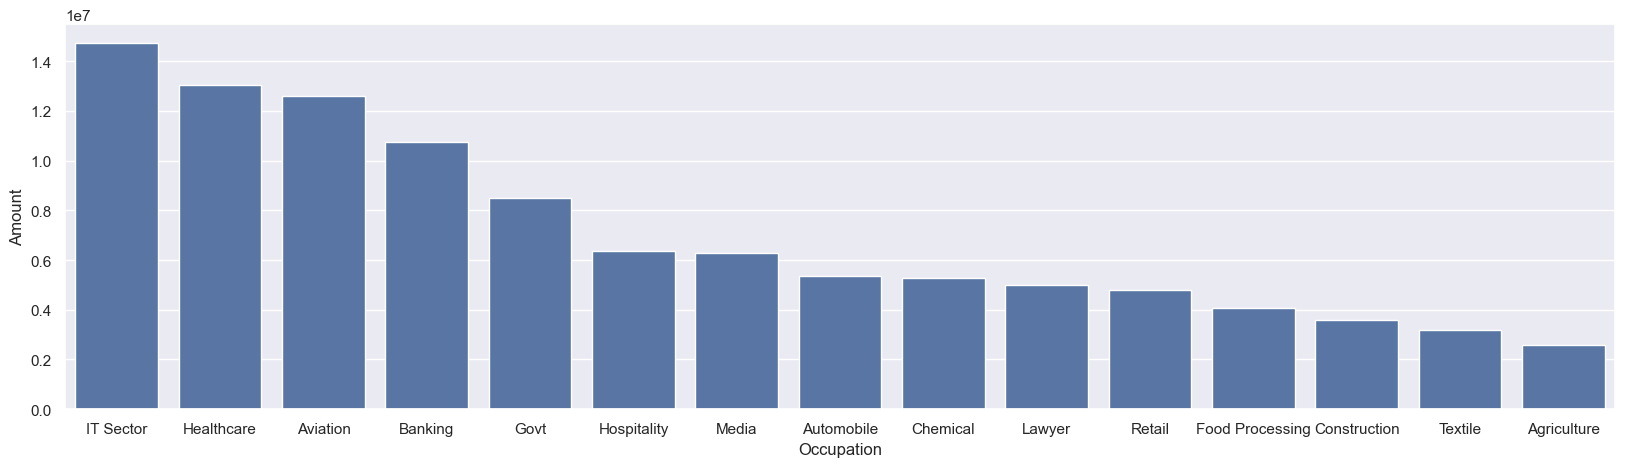

In [22]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.show()

The visual representations indicate that a significant number of purchasers belong to the IT, Healthcare, and Aviation industries.

**Product Category**

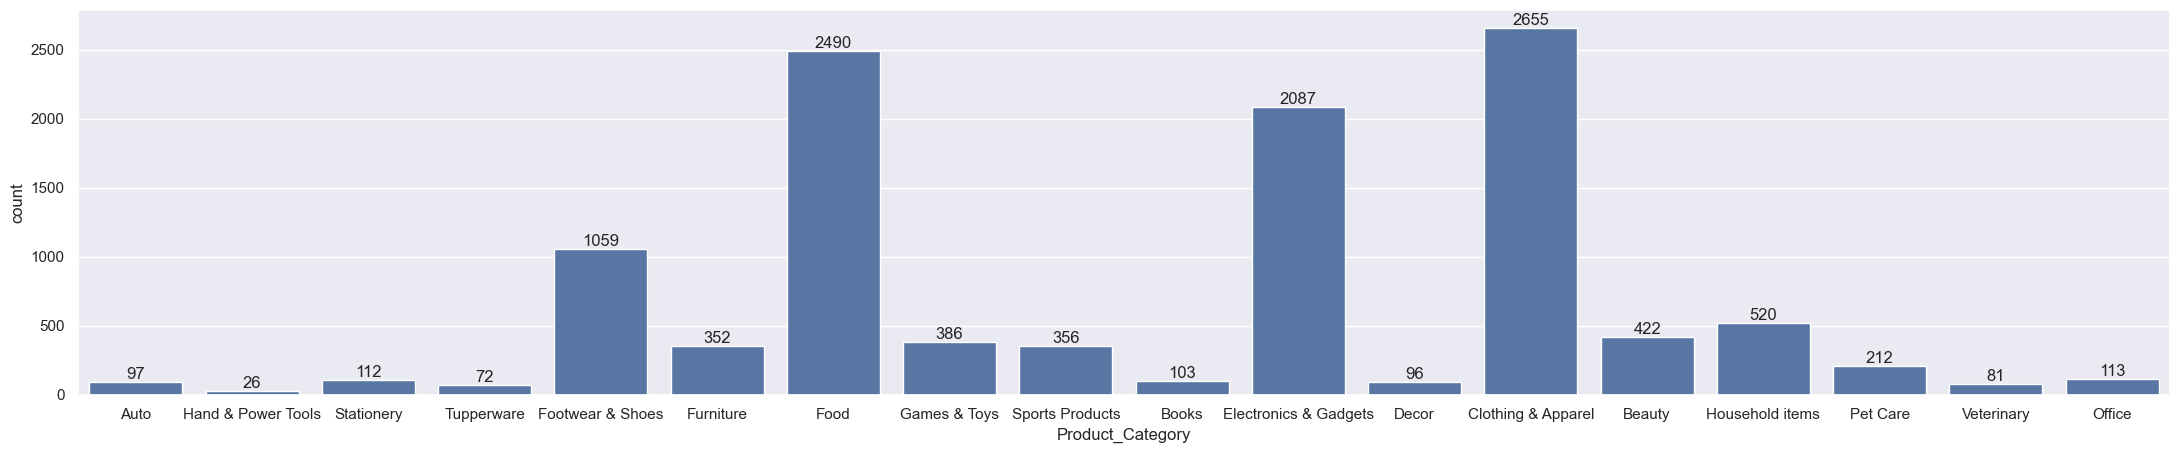

In [23]:
sns.set(rc={'figure.figsize':(27,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
plt.bar_label(ax.containers[0]) 
plt.show()

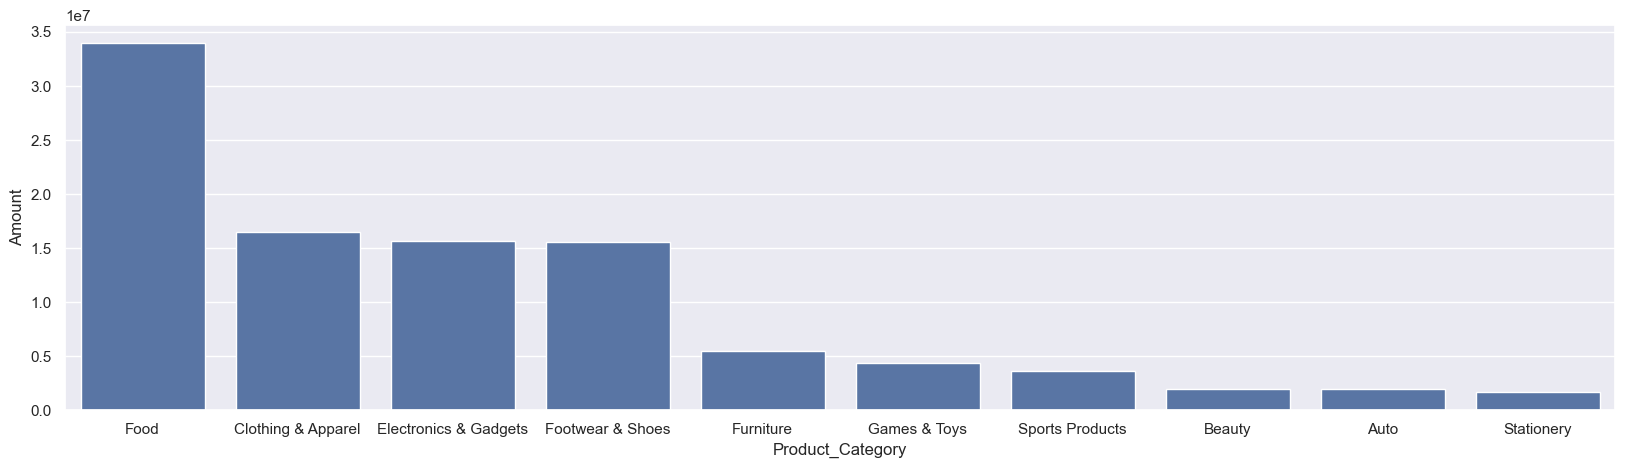

In [24]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.show()

The visual data suggests that a majority of the sold items come from the Food, Clothing, and Electronics categories.

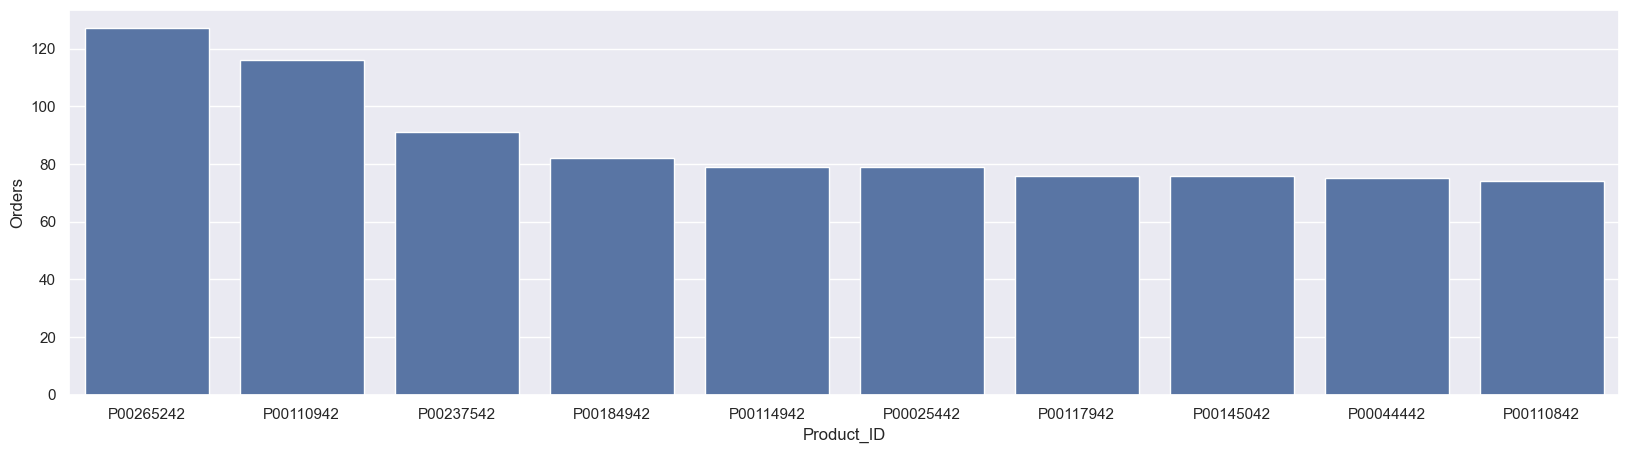

In [25]:
# top 10 most sold products
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.show()

**Summary**

*arried women aged between 26 to 35 years residing in Uttar Pradesh (UP), Maharashtra, and Karnataka, engaged in occupations related to IT, Healthcare, and Aviation, exhibit a higher tendency to purchase products primarily falling within the categories of Food, Clothing, and Electronics.*